In [186]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ctc-prediction-of-new-hire/Test_data_file.xlsx
/kaggle/input/ctc-prediction-of-new-hire/Data_file.xlsx


In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [188]:
data = pd.read_excel('/kaggle/input/ctc-prediction-of-new-hire/Data_file.xlsx', skiprows=2)

In [189]:
data.shape

(1338, 9)

In [190]:
data.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.No.                 1338 non-null   int64  
 1   College               1338 non-null   object 
 2   Role                  1338 non-null   object 
 3   City type             1338 non-null   object 
 4   Previous CTC          1338 non-null   int64  
 5   Previous job changes  1338 non-null   int64  
 6   Graduation marks      1338 non-null   int64  
 7   Exp (Months)          1338 non-null   int64  
 8   CTC                   1338 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 94.2+ KB


In [192]:
data.columns

Index(['S.No.', 'College', 'Role', 'City type', 'Previous CTC',
       'Previous job changes', 'Graduation marks', 'Exp (Months)', 'CTC'],
      dtype='object')

In [193]:
cols=['S.No.', 'College', 'Role', 'City type', 'Previous CTC',
       'Previous job changes', 'Graduation marks', 'Exp (Months)', 'CTC']

In [194]:
for i in cols:
    print(i + ': ')
    print(data[i].unique())

S.No.: 
[   1    2    3 ... 1336 1337 1338]
College: 
['Tier 1' 'Tier 2' 'Tier 3']
Role: 
['Manager' 'Executive']
City type: 
['Non-Metro' 'Metro']
Previous CTC: 
[55523 57081 60347 ... 61957 53203 51820]
Previous job changes: 
[3 1 2 4]
Graduation marks: 
[66 84 52 81 74 73 42 56 40 47 50 71 49 48 72 79 61 35 68 44 37 82 43 65
 75 64 80 41 77 46 69 54 60 63 58 45 55 57 38 83 70 59 39 67 85 78 62 51
 53 76 36]
Exp (Months): 
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
CTC: 
[71406.57653108 68005.87063056 76764.02027697 ... 66397.77068649
 64044.38294859 83346.06096109]


In [195]:
df=data.copy()

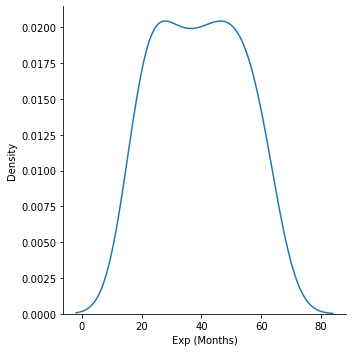

In [196]:
sns.displot(df, x="Exp (Months)", kind="kde", bw_adjust=2)

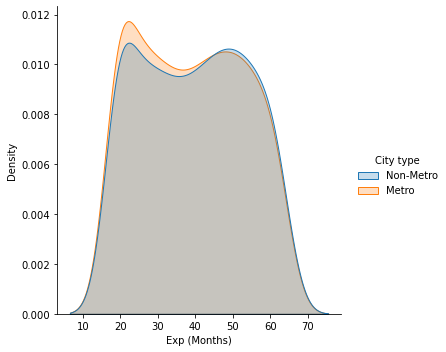

In [197]:
sns.displot(df, x="Exp (Months)", hue="City type", kind="kde", fill=True)

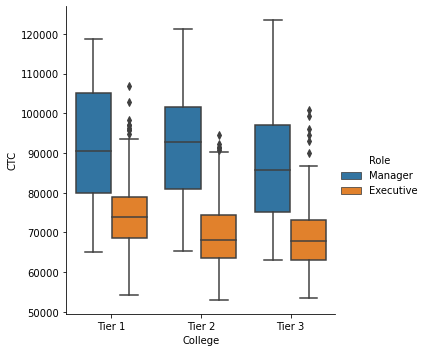

In [198]:
sns.catplot(data=df, x="College", y="CTC", hue="Role", kind="box")

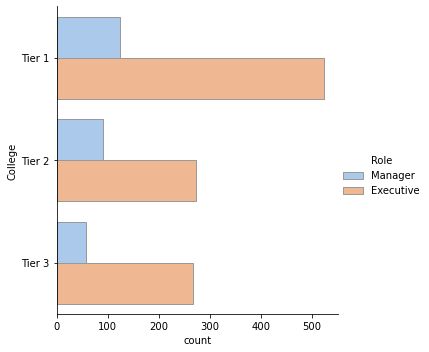

In [199]:
sns.catplot(
    data=df, y="College", hue="Role", kind="count",
    palette="pastel", edgecolor=".6",
)

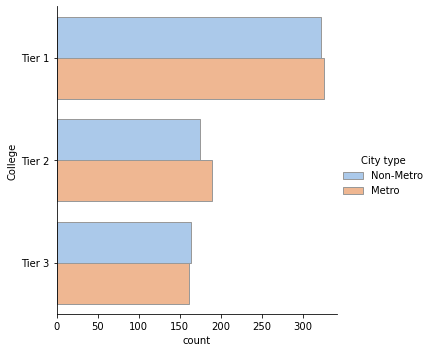

In [200]:
sns.catplot(
    data=df, y="College", hue="City type", kind="count",
    palette="pastel", edgecolor=".6",
)

In [201]:
df.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [202]:
duplicates=df.duplicated() 

In [203]:
duplicates.sum()

0

In [204]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


CTC                     76
City type                0
College                  0
Exp (Months)             0
Graduation marks         0
Previous CTC             4
Previous job changes     0
Role                     0
S.No.                    0
dtype: int64

In [205]:
def outliers(data,cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        Up=Q3 + (1.5 * IQR)
        Low=Q1 - (1.5 * IQR)
        data[col]=np.where(data[col]> Up,Up,np.where(data[col]<Low,Low,data[col]))

In [206]:
column=['CTC','Previous CTC']

In [207]:
outliers(df,column)

In [208]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


CTC                     0
City type               0
College                 0
Exp (Months)            0
Graduation marks        0
Previous CTC            0
Previous job changes    0
Role                    0
S.No.                   0
dtype: int64

In [209]:
df1=df.copy()

In [210]:
df1.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523.0,3,66,19,71406.576531
1,2,Tier 2,Executive,Metro,57081.0,1,84,18,68005.870631
2,3,Tier 2,Executive,Metro,60347.0,2,52,28,76764.020277
3,4,Tier 3,Executive,Metro,49010.0,2,81,33,82092.386880
4,5,Tier 3,Executive,Metro,57879.0,4,74,32,73878.097729


In [211]:
df2 = pd.get_dummies(df1)
df2.head()

,S.No.,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,College_Tier 3,Role_Executive,Role_Manager,City type_Metro,City type_Non-Metro
0,1,55523.0,3,66,19,71406.576531,1,0,0,0,1,0,1
1,2,57081.0,1,84,18,68005.870631,0,1,0,1,0,1,0
2,3,60347.0,2,52,28,76764.020277,0,1,0,1,0,1,0
3,4,49010.0,2,81,33,82092.386880,0,0,1,1,0,1,0
4,5,57879.0,4,74,32,73878.097729,0,0,1,1,0,1,0


In [212]:
df2.columns

Index(['S.No.', 'Previous CTC', 'Previous job changes', 'Graduation marks',
       'Exp (Months)', 'CTC', 'College_Tier 1', 'College_Tier 2',
       'College_Tier 3', 'Role_Executive', 'Role_Manager', 'City type_Metro',
       'City type_Non-Metro'],
      dtype='object')

In [213]:
df2.drop(['S.No.'],axis=1,inplace=True)

In [214]:
df2.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,College_Tier 3,Role_Executive,Role_Manager,City type_Metro,City type_Non-Metro
0,55523.0,3,66,19,71406.576531,1,0,0,0,1,0,1
1,57081.0,1,84,18,68005.870631,0,1,0,1,0,1,0
2,60347.0,2,52,28,76764.020277,0,1,0,1,0,1,0
3,49010.0,2,81,33,82092.386880,0,0,1,1,0,1,0
4,57879.0,4,74,32,73878.097729,0,0,1,1,0,1,0


In [215]:
df2.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,College_Tier 3,Role_Executive,Role_Manager,City type_Metro,City type_Non-Metro
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55575.515695,2.525411,59.890882,39.207025,75080.685724,0.485052,0.272048,0.242900,0.795217,0.204783,0.505232,0.494768
std,6666.701450,1.123502,14.894696,14.049960,11557.185422,0.499963,0.445181,0.428995,0.403694,0.403694,0.500160,0.500160
min,36990.000000,1.000000,35.000000,18.000000,53020.319026,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50547.000000,2.000000,47.000000,27.000000,66905.070033,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55293.500000,3.000000,60.000000,39.000000,73112.640487,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,60150.500000,4.000000,73.000000,51.000000,80747.178420,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,74555.750000,4.000000,85.000000,64.000000,101510.341001,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [216]:
x=df2.drop('CTC',axis=1)
y=df2['CTC']

In [217]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((936, 11), (402, 11), (936,), (402,))

In [218]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.transform(x_test)

In [219]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

lin= LinearRegression()
svr=SVR()
reg = GradientBoostingRegressor(random_state=0)
sgd=SGDClassifier()
KernelRidge=KernelRidge()
dtree=DecisionTreeRegressor()
rfg=RandomForestRegressor()

models=[lin,svr,reg,KernelRidge,dtree,rfg]

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)


for ml in models:
    print(ml)
    print(cross_val_score(ml, x, y, cv=cv))

LinearRegression()
[0.65822456 0.60678209 0.55202814 0.63785146 0.65260263]
SVR()
[-0.02275901 -0.06478519 -0.06011511 -0.01912341 -0.03588856]
GradientBoostingRegressor(random_state=0)
[0.69579639 0.63401546 0.60387553 0.67362366 0.69445304]
KernelRidge()
[0.65657378 0.60665521 0.55045689 0.63675485 0.65240467]
DecisionTreeRegressor()
[0.24455924 0.3466067  0.26318739 0.26756226 0.32136614]
RandomForestRegressor()
[0.64800388 0.60826746 0.57950452 0.64862833 0.66662647]


**We get only maximum 69% score...**